In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")


In [ ]:
data


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
data


array([[2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y_train


array([1, 1, 6, ..., 4, 4, 3])

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 9 ... 6 1 1] [1 1 6 ... 4 4 3]
0.10640677966101694
Iteration:  10
[9 2 6 ... 2 2 1] [1 1 6 ... 4 4 3]
0.19633898305084746
Iteration:  20
[2 2 6 ... 2 2 1] [1 1 6 ... 4 4 3]
0.26222033898305086
Iteration:  30
[2 2 6 ... 2 9 0] [1 1 6 ... 4 4 3]
0.3410169491525424
Iteration:  40
[1 1 6 ... 2 9 0] [1 1 6 ... 4 4 3]
0.39872881355932205
Iteration:  50
[1 1 6 ... 2 9 3] [1 1 6 ... 4 4 3]
0.45761016949152544
Iteration:  60
[1 1 6 ... 2 9 3] [1 1 6 ... 4 4 3]
0.5147627118644068
Iteration:  70
[1 1 6 ... 8 9 3] [1 1 6 ... 4 4 3]
0.5617796610169492
Iteration:  80
[1 1 6 ... 8 9 3] [1 1 6 ... 4 4 3]
0.6006779661016949
Iteration:  90
[1 1 6 ... 8 9 3] [1 1 6 ... 4 4 3]
0.6309152542372881
Iteration:  100
[1 1 6 ... 8 9 3] [1 1 6 ... 4 4 3]
0.654542372881356
Iteration:  110
[1 1 6 ... 8 9 3] [1 1 6 ... 4 4 3]
0.6734745762711865
Iteration:  120
[1 1 6 ... 8 9 3] [1 1 6 ... 4 4 3]
0.6910169491525424
Iteration:  130
[1 1 6 ... 8 9 3] [1 1 6 ... 4 4 3]
0.7053728813559322
Iteration:  1

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


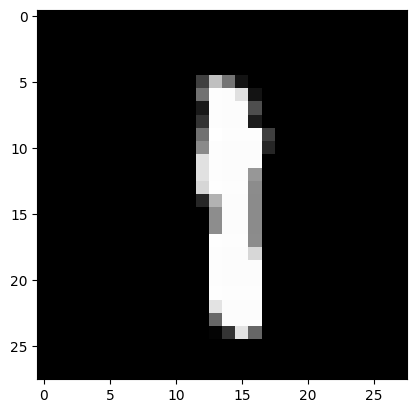

Prediction:  [1]
Label:  1


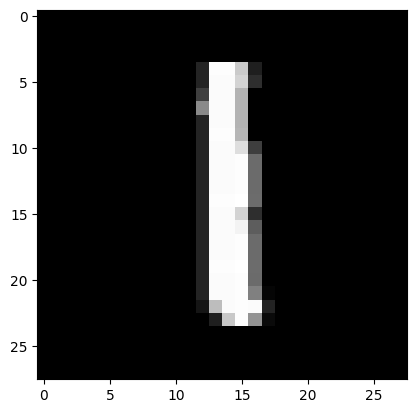

Prediction:  [6]
Label:  6


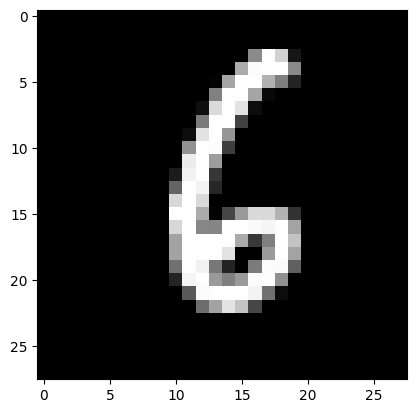

Prediction:  [6]
Label:  6


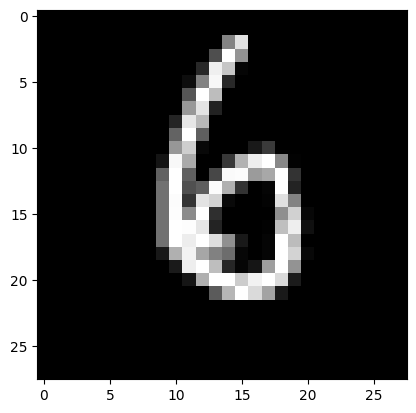

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 6 4 1 3 7 6 6 6 5 6 0 7 9 9 4 5 5 4 9 6 3 4 2 0 4 1 7 3 8 3 6 0 9 9 6 0
 8 2 2 0 3 7 5 4 1 8 7 3 4 6 4 7 3 6 8 2 1 8 4 0 9 9 9 3 3 4 4 6 2 0 8 1 4
 7 7 8 9 5 7 2 0 9 4 0 7 3 2 1 5 7 6 0 3 9 1 4 7 9 4 6 1 6 3 6 8 1 6 9 6 3
 5 8 1 9 6 8 8 2 9 7 6 0 0 1 2 0 4 5 4 7 6 7 0 2 0 6 5 7 3 3 3 7 3 6 3 6 0
 7 2 0 5 3 0 0 7 7 0 0 8 0 5 3 9 9 1 0 5 0 6 1 4 5 6 7 3 0 7 5 2 4 7 1 8 4
 0 0 8 4 8 3 2 4 9 4 7 1 2 9 5 7 4 8 2 2 8 1 8 2 1 4 3 9 0 2 4 6 6 0 0 8 9
 5 5 0 8 5 0 3 0 7 1 7 6 7 8 0 1 2 2 7 9 4 9 5 8 5 1 4 5 1 1 2 7 2 7 8 1 7
 3 0 8 2 6 0 0 7 7 1 3 1 6 3 2 6 4 6 7 8 4 6 7 3 4 8 3 7 8 1 1 3 7 0 5 9 7
 8 2 0 1 8 4 4 8 6 8 4 4 8 4 6 6 3 9 2 3 6 1 7 3 9 8 6 7 5 4 1 2 9 0 1 6 3
 0 5 8 3 1 2 2 8 1 0 2 0 7 5 7 8 1 7 0 2 4 3 6 8 7 8 8 5 7 8 0 1 1 1 3 7 5
 2 2 7 4 6 8 2 7 7 1 1 1 6 5 1 8 2 2 0 4 8 8 4 1 4 8 3 6 2 2 1 8 1 5 9 7 4
 0 4 7 2 4 1 6 3 8 3 5 7 8 7 0 9 9 9 7 4 0 1 5 0 9 6 7 2 1 0 9 0 2 6 4 0 2
 8 6 6 4 4 7 5 6 7 4 2 3 1 5 8 0 2 7 2 6 5 2 6 7 5 1 0 3 9 5 6 3 1 4 6 1 2
 7 1 1 0 8 3 6 5 6 7 3 4 

0.854